In [120]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.5f}'.format # display floating points in pandas with 5 digits after decimal points

PROJECT_DIR = "./"
DATA_DIR = os.path.join(PROJECT_DIR, "data/")

In [121]:
train_set, test_set = pd.read_csv("data/train.csv"), pd.read_csv("data/test.csv")

In [122]:
train_set.head()

,participant,timestamp,accel_x,accel_y,accel_z,skin_temp,heart_rate,blood_volume_pulse,eda,inter_beat_interval,stress
0,S01,1644226071.00000,-16.00000,-14.00000,59.00000,28.39000,83.00000,-26.61000,0.16913,0.89062,False
1,S01,1644226072.00000,-19.00000,-8.00000,62.00000,28.43000,83.00000,44.90000,0.17297,0.89062,False
2,S01,1644226073.00000,-15.00000,-12.00000,60.00000,28.43000,72.67000,17.57000,0.17297,0.89062,False
3,S01,1644226074.00000,-28.00000,-11.00000,53.00000,28.47000,87.00000,91.18000,0.17681,0.89062,False
4,S01,1644226075.00000,-28.00000,-17.00000,56.00000,28.49000,80.00000,-136.83000,0.16913,0.89062,False


In [123]:
test_set.head()

,participant,timestamp,accel_x,accel_y,accel_z,skin_temp,heart_rate,blood_volume_pulse,eda,inter_beat_interval,stress
0,S29,1646656779.00000,-7.00000,39.00000,50.00000,24.71000,55.00000,2.96000,0.83185,0.56250,False
1,S29,1646656780.00000,-7.00000,39.00000,50.00000,24.71000,56.50000,-33.26000,0.83057,0.56250,False
2,S29,1646656781.00000,-7.00000,39.00000,51.00000,24.71000,56.67000,-15.46000,0.83698,0.56250,False
3,S29,1646656782.00000,-7.00000,39.00000,50.00000,24.71000,57.75000,-4.13000,0.84210,0.56250,False
4,S29,1646656783.00000,-7.00000,39.00000,50.00000,24.69000,59.60000,68.21000,0.84979,0.56250,False


In [124]:
def moving_window(df, window_size=60):
    for idx in range(0, len(df)-window_size):
        yield df.iloc[idx:idx+window_size], df.iloc[idx+window_size]

In [125]:
train_set = pd.DataFrame([{
    "heart_rate_avg": X['heart_rate'].mean(),
    "heart_rate_std": X['heart_rate'].std(),
    "hrv": np.sqrt(np.mean(np.power(X['inter_beat_interval'].diff(), 2))),
    "skin_temp_avg": X['skin_temp'].mean(),
    "skin_temp_std": X['skin_temp'].std(),
#     "eda_avg": X['eda'].mean(),
#     "eda_std": X['eda'].std(),
#     "accel_x_avg": X['accel_x'].mean(),
#     "accel_x_std": X['accel_x'].std(),
#     "accel_x_peak": X['accel_x'].max(),
#     "accel_y_avg": X['accel_y'].mean(),
#     "accel_y_std": X['accel_y'].std(),
#     "accel_y_peak": X['accel_y'].max(),
#     "accel_z_avg": X['accel_z'].mean(),
#     "accel_z_std": X['accel_z'].std(),
#     "accel_z_peak": X['accel_z'].max(),
#     "accel_3D_avg": (X['accel_x'] + X['accel_y'] + X['accel_z']).mean(),
#     "accel_3D_std": (X['accel_x'] + X['accel_y'] + X['accel_z']).std(),
    "stress": y['stress']
} for X, y in moving_window(train_set)]).reset_index(drop=True)

test_set = pd.DataFrame([{
    "heart_rate_avg": X['heart_rate'].mean(),
    "heart_rate_std": X['heart_rate'].std(),
    "hrv": np.sqrt(np.mean(np.power(X['inter_beat_interval'].diff(), 2))),
    "skin_temp_avg": X['skin_temp'].mean(),
    "skin_temp_std": X['skin_temp'].std(),
#     "eda_avg": X['eda'].mean(),
#     "eda_std": X['eda'].std(),
#     "accel_x_avg": X['accel_x'].mean(),
#     "accel_x_std": X['accel_x'].std(),
#     "accel_x_peak": X['accel_x'].max(),
#     "accel_y_avg": X['accel_y'].mean(),
#     "accel_y_std": X['accel_y'].std(),
#     "accel_y_peak": X['accel_y'].max(),
#     "accel_z_avg": X['accel_z'].mean(),
#     "accel_z_std": X['accel_z'].std(),
#     "accel_z_peak": X['accel_z'].max(),
#     "accel_3D_avg": (X['accel_x'] + X['accel_y'] + X['accel_z']).mean(),
#     "accel_3D_std": (X['accel_x'] + X['accel_y'] + X['accel_z']).std(),
    "stress": y['stress']
} for X, y in moving_window(test_set)]).reset_index(drop=True)

In [126]:
test_set.describe()

,heart_rate_avg,heart_rate_std,hrv,skin_temp_avg,skin_temp_std
count,22840.00000,22840.00000,22840.00000,22840.00000,22840.00000
mean,81.13510,2.66176,0.03362,31.44784,0.05626
std,13.36186,2.51536,0.02198,2.22603,0.14335
min,52.04183,0.07986,0.00000,24.95667,0.00896
25%,73.18208,0.89263,0.01993,30.12925,0.01895
50%,80.51067,1.71830,0.03274,31.46600,0.02889
75%,87.52342,3.57885,0.04701,32.74633,0.05217
max,138.14517,17.31564,0.14390,35.48717,2.28123


In [127]:
train_set.describe()

,heart_rate_avg,heart_rate_std,hrv,skin_temp_avg,skin_temp_std
count,88339.00000,88339.00000,88339.00000,88339.00000,88339.00000
mean,79.86417,2.64460,0.03497,31.16534,0.05830
std,11.90360,2.35728,0.02260,2.37172,0.18254
min,55.76933,0.07522,0.00000,23.64133,0.00773
25%,71.33767,1.04995,0.01919,29.34000,0.01836
50%,77.00900,1.91960,0.03488,31.05300,0.02768
75%,86.20475,3.40501,0.04924,32.82708,0.04745
max,144.12600,20.41489,0.16682,36.34000,3.40092


In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

X_train, y_train = train_set.drop(['stress'], axis=1), train_set['stress'].copy()
X_test, y_test = test_set.drop(['stress'], axis=1), test_set['stress'].copy()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"f1 score: {f1_score(y_test, y_pred)}")

accuracy score: 0.6015761821366025
f1 score: 0.34692119994258647


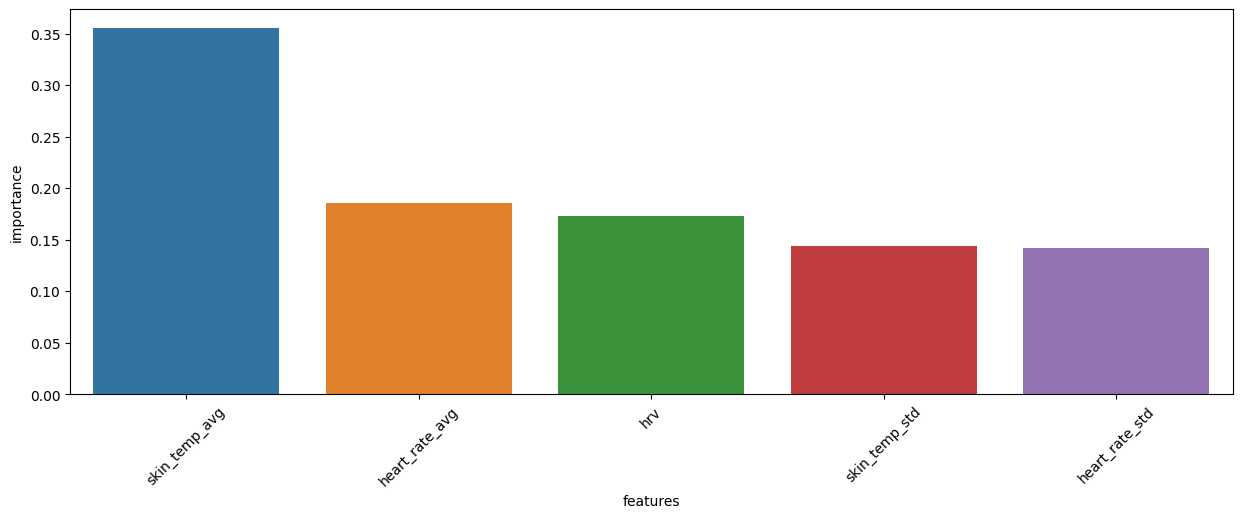

In [129]:
importances = pd.Series(clf.feature_importances_, index=X_train.columns.tolist())
importances = importances.sort_values(ascending=False)
importances = pd.DataFrame({
    "features": importances.index,
    "importance": importances.values
})

fig = plt.figure(figsize=(15, 5))

sns.barplot(data=importances, x='features', y='importance')

_ = plt.xticks(rotation=45)

In [42]:
def leave_one_participant_out_cv(df):
    participants = df['participant'].unique().tolist()
    for participant in participants:
        yield [p for p in participants if p != participant], participant

for train, test in leave_one_participant_out_cv(train_set):
    print(train, test)

['S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28'] S01
['S01', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28'] S02
['S01', 'S02', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28'] S03
['S01', 'S02', 'S03', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28'] S04
['S01', 'S02', 'S03', 'S04', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28'] S05
['S01', 'S02', 'S03', 'S04', '